<a href="https://colab.research.google.com/github/melodyhe21/Predicting-Potability/blob/main/Melody's_Copy_of_ML_Environment_Async5_CM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaining Insight Through Computational Modeling - Async 4
## Machine Learning: Environment

#### Author - Rachel Calder
#### Student - Melody He
#### Description - Data visualization is the use of graphs, charts, or other visualizations to explore the data and identify patterns and trends. Through this notebook, we will explore data and create some visualizations to help us understands its patterns and trends. **Save a copy of this notebook to your student folder.**

##### *This notebook is written in python computer language. To run a block of code, click on the block, and press the play button.

The data used in this notebook is provided by Kaggle. The data was collcted to assess the potability of water. You can learn more about the dataset here: https://www.kaggle.com/adityakadiwal/water-potability



## Loading Python Libraries


In [ ]:
## Load necessary libraries

#pandas helps us handle data tables
#importing pandas as pd means we are giving pandas a short nickname (pd) that is quicker to type
import pandas as pd

#numpy helps us handle 
import numpy as np

#matplotlib helps us make basic plots
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

#seaborn helps us make intricate plots
import seaborn as sns

#import google drive
from google.colab import drive

#import machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

#give google colab access to your google drive
#click on the link in the output. It will take you to a new page where you will need to give permission to Google Colab to access your Google Drive.
#copy the link and paste it into the box below.
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#view what folders you now have access to
!ls "/content/gdrive/MyDrive"

 204D0C7A-5CBA-4B63-9D62-D29BFB2C0960.jpeg   colleges.xlsx
 973A8405-E9BA-4EB7-9E7F-4366766634BB.jpeg  'dorm essentials.gdoc'
 CM_Datasets				     Melody
'Colab Notebooks'			    'Melody He College 2021.gsheet'
 colleges.gsheet			    'Melody He College 2021.xlsx'


# Load Data

Note: You will get an error in the next cell if you did not save a shortcut of the "[CM_Datasets](https://drive.google.com/drive/u/1/folders/1WxSk_jD0x5rVSNiT8bM_58aMtG5Sqf4V)" folder to your drive. You *may* need to remount your drive to reflect new changes.

In [ ]:
# Load data

#provide the data location
filename = '/content/gdrive/MyDrive/CM_Datasets/water_potability.csv'

#ask pandas to grab the data from the location and name it as df (short for data frame)
df = pd.read_csv(filename)

#display dataframe
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# Data Cleaning

Missing Values

In [ ]:
#search if there are any missing values in the data set
df.isnull().sum().sort_values()

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
Trihalomethanes    162
ph                 491
Sulfate            781
dtype: int64

# Copy over code you used to clean your dataset.

In [ ]:
#this code below will allow you to drop the columns you do not want.
#you need to put the column names in quotes
#uncomment the line of code below by deleting the '#' mark

df_drop = df.drop([], axis=1) 
#we are not dropping any of the columns

In [ ]:
#fill in the remaining NaN with the means of each column
column_means = df_drop.mean()
df_drop = df_drop.fillna(column_means)
df_drop.isnull().sum().sort_values()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Once you are satisfied with your dataset make sure it is named df_drop in order for it the next block of code to work

#**Machine Learning**

Next we will split our data into training and testing sets and their labels

In [ ]:
#seperate features from label
df_drop_x = df_drop[df_drop.columns[0:(len(df_drop.columns)-1)]]
df_drop_y = df_drop['Potability']

#normalize with z normalization
#We are not normalizing the data, but if we were, we would uncomment the code below
#df_drop_x_norm = df_drop_x.apply(zscore)

#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df_drop_x, df_drop_y, 
                                                    test_size = 0.20, random_state = 99)

Now it is time to make a [linear regression model](https://en.wikipedia.org/wiki/Linear_regression). We will fit the model to the data. Then we will give the model our testing data and have it make predictions as to what the label option might be: potable or not potable. We will use a package called "accuracy_score" to give us the accuracy of our model's predictions against the actual label.

Accuracy score of logistic regression model:  0.6234756097560976


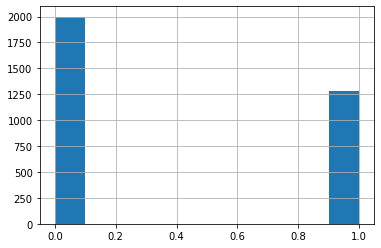

In [ ]:
#set up logistic regression classifier
logmod = LogisticRegression()

#fit the classifier to the data
logmod.fit(X_train, y_train)

#obtain model predictions
y_hat = logmod.predict(X_test)

#obtain accuracy of model
print("Accuracy score of logistic regression model: ", accuracy_score(y_test, y_hat))

df_drop_y.hist()

#Q1

What is the accuracy of the logistic regression model?

Student Response: 0.6234756097560976

#Q2
What is this model predicting? The logistic regression model predicts, based on all of the testing data provided, whether the sample is potable or not potable.

Student Response: 

#Q3
Is this accuracy acceptable for making predictions or should we try other models as well?

Student Response: The accuracy is a little low--0.62 accuracy is not very satisfactory, so I believe that we should try other models besides logistic regression.